In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
df_05v = pd.read_csv('../docs/0.5v_1000data_250delay.csv')
df_05v = df_05v["voltage"]
df_3v = pd.read_csv('../docs/3v_1000data_250delay.csv')
df_3v = df_3v["voltage"]
df_6v = pd.read_csv('../docs/6v_1000data_250delay.csv')
df_6v = df_6v["voltage"]
df_9v = pd.read_csv('../docs/9v_1000data_250delay.csv')
df_9v = df_9v["voltage"]
df_12v = pd.read_csv('../docs/12v_1000data_250delay.csv')
df_12v = df_12v["voltage"]
df_15v = pd.read_csv('../docs/15v_1000data_250delay.csv')
df_15v = df_15v["voltage"]
df_18v = pd.read_csv('../docs/18v_1000data_250delay.csv')
df_18v = df_18v["voltage"]
df_21v = pd.read_csv('../docs/21v_1000data_250delay.csv')
df_21v = df_21v["voltage"]

In [47]:
df = {
    'voltage' : []
}
for i in df_05v:
    df['voltage'].append(abs(i-0.5)/0.5)
for i in df_3v:
    df['voltage'].append(abs(i-3)/3)
for i in df_6v:
    df['voltage'].append(abs(i-6)/6)
for i in df_9v:
    df['voltage'].append(abs(i-9)/9)
for i in df_12v:
    df['voltage'].append(abs(i-12)/12)
for i in df_15v:
    df['voltage'].append(abs(i-15)/15)
for i in df_18v:
    df['voltage'].append(abs(i-18)/18)
for i in df_21v:
    df['voltage'].append(abs(i-21)/21)

df = pd.DataFrame(df)
df

,voltage
0,0.020000
1,0.080000
2,0.020000
3,0.080000
4,0.120000
...,...
7995,0.005714
7996,0.004286
7997,0.001905
7998,0.004286


In [48]:
df["voltage"] = df["voltage"] * 100
df

,voltage
0,2.000000
1,8.000000
2,2.000000
3,8.000000
4,12.000000
...,...
7995,0.571429
7996,0.428571
7997,0.190476
7998,0.428571


In [49]:
mean_df = df["voltage"].mean()
mode_df = df["voltage"].mode()[0]
median_df = df["voltage"].median()
print(f"mean {mean_df}, median : {median_df}, mode : {mode_df}")

mean 1.6510612103174593, median : 0.5000000000000042, mode : 0.6666666666666672


g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


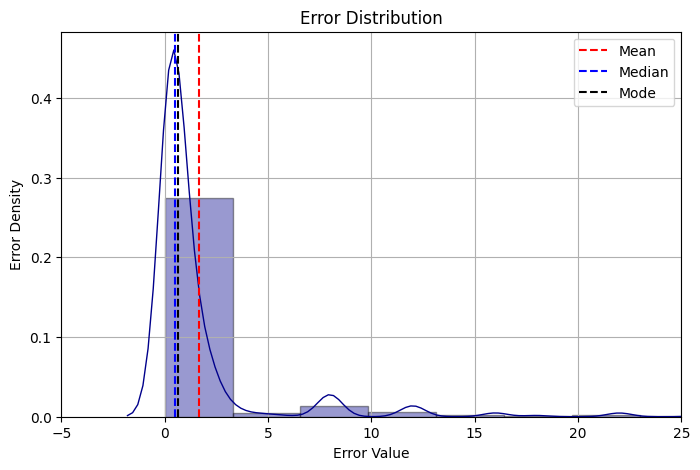

In [58]:
# seaborn histogram
bin_count = int(np.ceil(np.log2(len(df["voltage"]))) + 1)
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
sns.distplot(df["voltage"] , bins=bin_count, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.axvline(x=df["voltage"].mean(), linestyle="--", label="Mean", color='r')
plt.axvline(x=df["voltage"].median(), linestyle="--", label="Median", color='b')
plt.axvline(x=mode_df, linestyle="--", label="Mode", color='k')
plt.xlim(-5, 25)
# Add labels
plt.grid()
plt.legend()
plt.title('Error Distribution')
plt.xlabel('Error Value')
plt.ylabel('Error Density')
plt.savefig('../img/error_distribution.png')

In [42]:
df = pd.read_csv('../docs/error_voltage_all.csv')

list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))
    df[i].astype(float)

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

,index,voltage,value
0,0,0.5v,2.000000
1,1,0.5v,8.000000
2,2,0.5v,2.000000
3,3,0.5v,8.000000
4,4,0.5v,12.000000
...,...,...,...
7995,995,21v,0.571429
7996,996,21v,0.428571
7997,997,21v,0.190476
7998,998,21v,0.428571


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


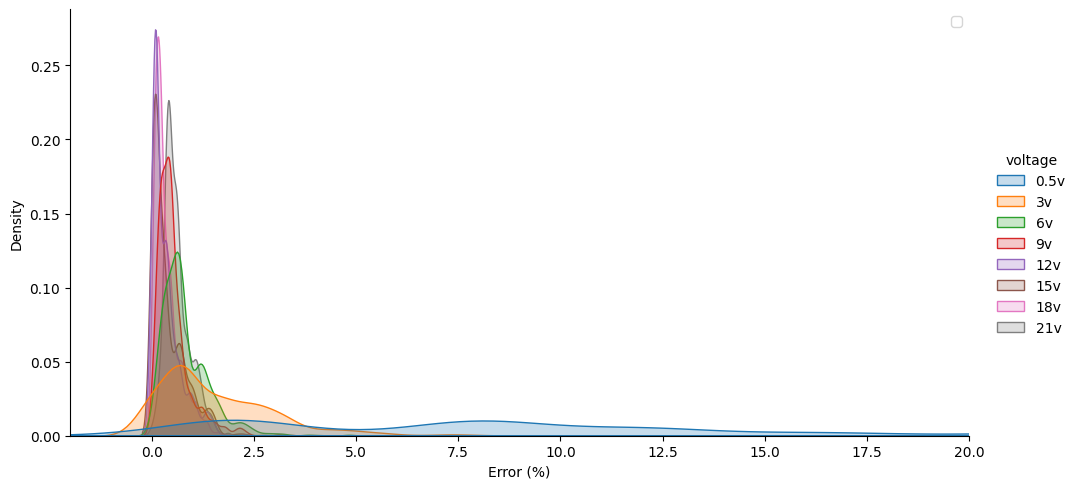

In [60]:
plt.rcParams['figure.figsize'] = [30, 10]

ax = sns.displot(df_melt, x="value", hue="voltage", kind="kde", fill=True, height=5, aspect=2)
ax.set(ylabel='Density', xlabel='Error (%)')
ax.set(xlim=(-2, 20))
plt.legend()
plt.show()                                                              